In [1]:
import pandas as pd
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [8]:
df = pd.read_csv('data/final_df_4.csv')
df

,latitude,longitude,year,month,dayofweek,county,dist_from_water,landcode,dist_from_campsite,label,quadrat,seasonality
0,36.56076,-118.76760,2006,6,1,Tulare,43.0,52,0.133035,1,198,Summer
1,37.77060,-119.51077,2007,9,4,Mariposa,185.0,52,0.133892,1,181,Fall
2,37.77060,-119.51077,2009,6,6,Mariposa,185.0,52,0.133892,1,181,Summer
3,37.66534,-119.72488,2007,9,5,Mariposa,185.0,42,0.133940,1,162,Fall
4,39.43248,-122.97443,2011,8,4,Lake,201.0,52,0.136146,0,51,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
82767,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall
82768,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall
82769,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall
82770,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall


In [9]:
le = preprocessing.LabelEncoder()
le.fit(df['county'])
df['county_cat'] = le.transform(df['county'])
df.drop(columns=['county'], inplace=True)
df.head()

,latitude,longitude,year,month,dayofweek,dist_from_water,landcode,dist_from_campsite,label,quadrat,seasonality,county_cat
0,36.56076,-118.76760,2006,6,1,43.0,52,0.133035,1,198,Summer,46
1,37.77060,-119.51077,2007,9,4,185.0,52,0.133892,1,181,Fall,19
2,37.77060,-119.51077,2009,6,6,185.0,52,0.133892,1,181,Summer,19
3,37.66534,-119.72488,2007,9,5,185.0,42,0.133940,1,162,Fall,19
4,39.43248,-122.97443,2011,8,4,201.0,52,0.136146,0,51,Summer,14


In [10]:
le = preprocessing.LabelEncoder()
le.fit(df['seasonality'])
df['season'] = le.transform(df['seasonality'])
df.drop(columns=['seasonality'], inplace=True)
df.head()

,latitude,longitude,year,month,dayofweek,dist_from_water,landcode,dist_from_campsite,label,quadrat,county_cat,season
0,36.56076,-118.76760,2006,6,1,43.0,52,0.133035,1,198,46,2
1,37.77060,-119.51077,2007,9,4,185.0,52,0.133892,1,181,19,0
2,37.77060,-119.51077,2009,6,6,185.0,52,0.133892,1,181,19,2
3,37.66534,-119.72488,2007,9,5,185.0,42,0.133940,1,162,19,0
4,39.43248,-122.97443,2011,8,4,201.0,52,0.136146,0,51,14,2


In [11]:
df.drop(columns=['quadrat'], inplace=True)
# df.drop(columns=['season'], inplace=True)

In [57]:
df.drop(columns=['dist_from_campsite'], inplace=True)

In [12]:
df

,latitude,longitude,year,month,dayofweek,dist_from_water,landcode,dist_from_campsite,label,county_cat,season
0,36.56076,-118.76760,2006,6,1,43.0,52,0.133035,1,46,2
1,37.77060,-119.51077,2007,9,4,185.0,52,0.133892,1,19,0
2,37.77060,-119.51077,2009,6,6,185.0,52,0.133892,1,19,2
3,37.66534,-119.72488,2007,9,5,185.0,42,0.133940,1,19,0
4,39.43248,-122.97443,2011,8,4,201.0,52,0.136146,0,14,2
...,...,...,...,...,...,...,...,...,...,...,...
82767,40.63035,-122.97143,2022,11,3,NaN,42,0.136668,0,53,0
82768,40.63035,-122.97143,2022,11,3,NaN,42,0.136668,0,53,0
82769,40.63035,-122.97143,2022,11,3,NaN,42,0.136668,0,53,0
82770,40.63035,-122.97143,2022,11,3,NaN,42,0.136668,0,53,0


In [13]:
# split data into X and y
X = df.loc[:,df.columns != 'label']
Y = df.loc[:,'label']

In [14]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [16]:
# training accuracy
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))


# testing acccuracy
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy: %.2f%%" % (accuracy * 100.0))


#f1 score
f1 = f1_score(y_test, predictions)
print("F1 Score: %.2f%%" % (f1 * 100.0))

Training Accuracy: 99.43%
Testing Accuracy: 99.16%
F1 Score: 99.43%


## Feature Importance

In [26]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [30]:
model = XGBClassifier() # define the model
model.fit(X, Y) # fit the model
importance = model.feature_importances_ # get importance
feature_names = X_train.columns

# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {feature_names[i]}, Score: {v:3f}')

Feature: latitude, Score: 0.106569
Feature: longitude, Score: 0.173241
Feature: year, Score: 0.146536
Feature: month, Score: 0.070717
Feature: dayofweek, Score: 0.056286
Feature: dist_from_water, Score: 0.073660
Feature: landcode, Score: 0.087026
Feature: dist_from_campsite, Score: 0.117668
Feature: county_cat, Score: 0.067768
Feature: season, Score: 0.100529


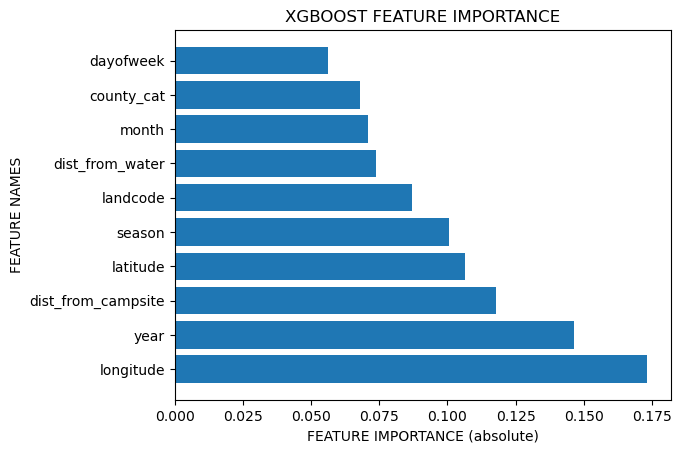

In [31]:
data={'feature_names':feature_names,'feature_importance':abs(importance)}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

rects = plt.barh(fi_df['feature_names'],fi_df['feature_importance'])


#Add chart labels
plt.title('XGBOOST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE (absolute)')
plt.ylabel('FEATURE NAMES')
plt.show()